<b>In this notebook I did the following:</b><b>
1. Implementation of the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Updated implementation to work for mini-batch.
</b>

### some details:
<br>
<b>
    
    1. Each implementation is in a sepearate function.
    2. Each function on the data in the attached file.
    3. r2-score > 0.9 using each functiion.
    4. I ploted the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. I choosed hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. I applied the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import datasets
from math import ceil

# 1- Adam batch 

In [30]:
def adam_batch_GD(x,y,alpha,eps,B1,B2,epoch):
    x=np.append(np.ones((x.shape[0],1)),x, axis=1)
    theta=np.zeros((x.shape[1],1))
    h =lambda x: x @ theta
    
    vt=np.zeros((x.shape[1],1))
    m=np.zeros((x.shape[1],1))
    v_corr=np.zeros((x.shape[1],1))
    m_corr=np.zeros((x.shape[1],1))
    theta_list= []
    loss=[]
    listh=[]
    n=None
    
    for i in range(epoch):
        
        theta_list.append(theta)
        
        j= (((h(x)-y)**2).sum())/(2*len(y))
        grad= (x.T @ (h(x)-y)) /len(y)
                   
        loss.append(j)

        m=B1*m +(1-B1)*grad
            
        vt=B2*vt+(1-B2)*grad**2
            
        #Bias correction 
        m_corr= m /(1-(B1**(i+1)))
        v_corr= vt /(1-(B2**(i+1)))
            
        theta=theta - (alpha /(v_corr**0.5 + eps))*m_corr
            
        if i>0:
            if abs(loss[-1]-loss[-2])<0.001:
                n=loss[-1]
                break
        listh.append(h(x))
        
        if np.linalg.norm(grad,2) <0.001:
            break
        
    print(theta)
    dict1={"theta":theta_list,"losses":loss,"equivellant losses": n,"hypothesis output":listh,"optimum theta":theta_list[-1]}
    return dict1

In [24]:
mv= np.genfromtxt("MultipleLR.csv ", delimiter=",")
x=mv[:,:3]
y=mv[:,3:]

In [31]:
check_func=adam_batch_GD(x,y,0.01,0.000000001,0.9,0.98,100)

[[0.6607478 ]
 [0.660641  ]
 [0.66060549]
 [0.66140354]]


In [34]:
print("R2_score =",r2_score(y,check_func['hypothesis output'][-1]))

R2_score = 0.9638859442872912


loss vs iterations:


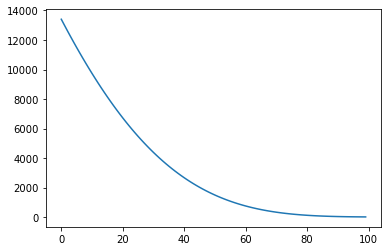

In [35]:
print("loss vs iterations:")
plt.plot(check_func["losses"])
plt.show()

theta 0 vs loss


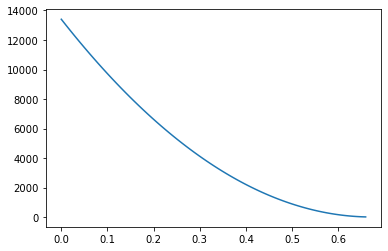

theta 1 vs loss


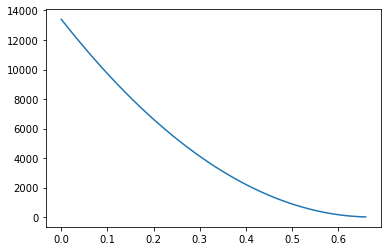

theta 2 vs loss


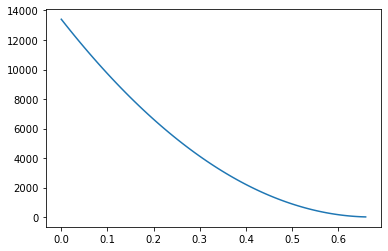

theta 3 vs loss


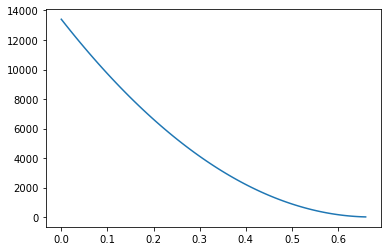

In [36]:
for i in range(x.shape[1]+1):
    print("theta",i,"vs loss")
    plt.plot(np.array(check_func["theta"]).T[0][i],check_func["losses"])
    plt.show()

# 2- Adam mini_batch (updated)

In [37]:
def adam_mini_GD(x,y,alpha,eps,B1,B2,epoch):
    x=np.append(np.ones((x.shape[0],1)),x, axis=1)
    theta=np.zeros((x.shape[1],1))
    h =lambda x: x @ theta
    
    vt=np.zeros((x.shape[1],1))
    m=np.zeros((x.shape[1],1))
    v_corr=np.zeros((x.shape[1],1))
    m_corr=np.zeros((x.shape[1],1))
    theta_list = []
    loss=[]
    listh=[]
    n=None
    batch=4
    
    for i in range(epoch):
        c=0
        for k in range(ceil((y.shape[0])/batch)):
            theta_list.append(theta)
            
            if c+batch > len(y)-1:
                j= (((h(x[c:,:])-y[c:])**2).sum())/(2*batch)
                grad= (x[c:,:].T @ (h(x[c:,:])-y[c:])) /batch
            
            else:
                j= (((h(x[c:c+batch,:])-y[c:c+batch])**2).sum())/(2*batch)
                grad= (x[c:c+batch,:].T @ (h(x[c:c+batch,:])-y[c:c+batch])) /batch
                   
            loss.append(j)

            m=B1*m +(1-B1)*grad
            
            vt=B2*vt+(1-B2)*grad**2
            
            #Bias correction 
            m_corr= m /(1-(B1**(k+1)))
            v_corr= vt /(1-(B2**(k+1)))
            
            theta=theta - (alpha /(v_corr**0.5 + eps))*m_corr
            
            c=c+batch
        if i>0 or k>0:
            if abs(loss[-1]-loss[-2])<0.001:
                n=loss[-1]
                print(i)
                break
        if np.linalg.norm(grad,2) <0.001:
            break
        listh.append(h(x))
        
    print(theta)
    dict1={"theta":theta_list,"losses":loss,"equivellant losses": n,"hypothesis output":listh,"optimum theta":theta_list[-1]}
    return dict1

In [38]:
check_f2=adam_mini_GD(x,y,0.01,0.000000001,0.9,0.98,100)

[[0.59616326]
 [0.58303607]
 [0.58750971]
 [0.84583569]]


In [39]:
print("R2_score =",r2_score(y,check_f2['hypothesis output'][-1]))

R2_score = 0.9847107407657466


loss vs iterations:


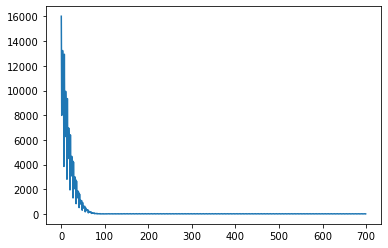

In [40]:
print("loss vs iterations:")
plt.plot(check_f2["losses"])
plt.show()

theta 0 vs loss


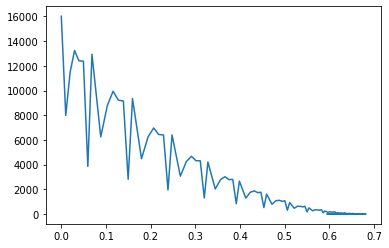

theta 1 vs loss


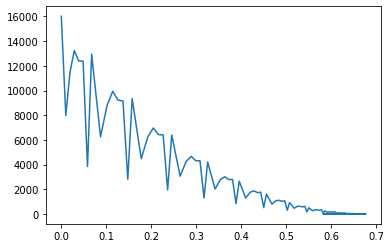

theta 2 vs loss


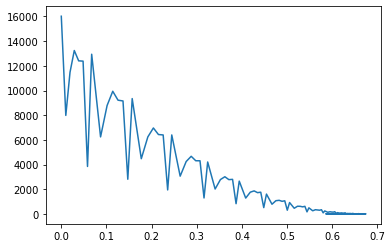

theta 3 vs loss


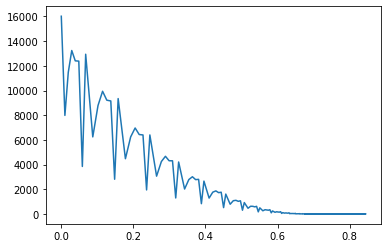

In [41]:
for i in range(x.shape[1]+1):
    print("theta",i,"vs loss")
    plt.plot(np.array(check_f2["theta"]).T[0][i],check_f2["losses"])
    plt.show()

thank you ^^